In [96]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, learning_curve
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.pipeline import make_pipeline

In [2]:
my_df = pd.read_csv("arab-subset2.csv")

In [3]:
my_df.drop(columns=["Country Name", "Country Code", "Total valid data", "Series Name"], inplace= True)

In [4]:
my_df.head()

,Series Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,EG.ELC.ACCS.ZS,80.736141,81.586231,81.540222,82.508159,82.503685,83.212982,85.459003,83.764440,83.386990,...,87.332661,87.039588,88.992620,88.015356,88.681886,89.195062,90.324659,88.910749,89.999946,90.277735
1,EG.ELC.ACCS.RU.ZS,68.173808,70.467440,70.028996,71.828643,68.204962,69.626669,73.452509,69.835346,69.623136,...,75.559816,75.377022,79.582622,77.666157,78.951592,79.791665,82.373066,82.970754,83.740500,81.660899
2,EG.ELC.ACCS.UR.ZS,94.862102,94.329788,94.329108,94.512786,94.615845,94.569273,95.335919,95.092511,94.387587,...,96.999402,96.980079,97.239057,96.856101,97.021313,97.261799,97.483658,97.581237,98.278287,97.540397
3,SP.ADO.TFRT,54.346048,53.309405,52.297739,51.897824,51.538385,51.212964,50.839602,50.519536,50.305291,...,49.866968,49.791067,49.345359,48.853998,48.279738,47.504739,46.687119,46.002723,45.245369,44.406611
4,SE.SEC.UNER.LO.ZS,27.792021,27.007050,25.998020,25.078751,24.007771,22.989800,22.770361,22.480301,21.773720,...,20.335569,19.065210,21.608210,20.438419,19.498341,18.654560,18.455170,17.220699,16.369221,16.837469


In [5]:
my_df.columns

Index(['Series Code', '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]',
       '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]',
       '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]',
       '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]',
       '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]',
       '2019 [YR2019]', '2020 [YR2020]'],
      dtype='object')

In [6]:
for ele in my_df["Series Code"]:
    if "SE.PRM.CMPT" in ele:
        print(ele)

SE.PRM.CMPT.FE.ZS
SE.PRM.CMPT.MA.ZS
SE.PRM.CMPT.ZS


In [7]:
df_tp = my_df.T
df_tp.head()

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
Series Code,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,SP.ADO.TFRT,SE.SEC.UNER.LO.ZS,SE.SEC.UNER.LO.FE.ZS,SE.SEC.UNER.LO.MA.ZS,SE.PRM.UNER.ZS,SE.PRM.UNER.FE.ZS,SE.PRM.UNER.MA.ZS,...,SL.UEM.TOTL.ZS,SL.UEM.1524.FE.ZS,SL.UEM.1524.MA.ZS,SL.UEM.1524.ZS,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,SP.URB.GROW,SL.EMP.WORK.FE.ZS,SL.EMP.WORK.MA.ZS,SL.EMP.WORK.ZS
2000 [YR2000],80.736141,68.173808,94.862102,54.346048,27.792021,33.825661,21.99515,21.88201,26.21769,17.724979,...,12.596101,32.629731,23.999154,26.504638,149612191.0,52.989302,2.634076,51.974793,61.661003,59.762448
2001 [YR2001],81.586231,70.46744,94.329788,53.309405,27.00705,32.677971,21.56945,20.748421,24.71862,16.945999,...,12.46938,33.293565,24.488499,27.012069,153594287.0,53.251444,2.661612,54.548243,61.748991,60.317576
2002 [YR2002],81.540222,70.028996,94.329108,52.297739,25.99802,31.18034,21.026739,19.84693,23.46406,16.37816,...,12.465001,31.212226,24.774243,26.684724,157691929.0,53.515626,2.667835,55.887452,61.240623,60.205566
2003 [YR2003],82.508159,71.828643,94.512786,51.897824,25.078751,29.772619,20.576309,19.278419,22.62163,16.071079,...,12.390521,31.84997,25.372652,27.221143,162002776.0,53.801167,2.733714,54.191779,61.344739,59.945188


In [8]:
# Set first row as column
new_header = df_tp.iloc[0]
df_tp = df_tp[1:]
df_tp.columns = new_header

In [9]:
"""
Target variable is primary completion rate for all (girls and boys)
"""

X = df_tp.drop(columns=["SE.PRM.CMPT.FE.ZS", "SE.PRM.CMPT.MA.ZS", "SE.PRM.CMPT.ZS"])
y = df_tp["SE.PRM.CMPT.ZS"]

# data split before any model fitting to avoid data leakage
my_seed = 1322878
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=my_seed)

In [10]:
# standardize data 
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [11]:
# base model - linear regression
lr = LinearRegression().fit(X_train_std, y_train)
y_pred_lr = lr.predict(X_test_std)

mean_squared_error(y_pred_lr, y_test)

1.4794537983909426

In [97]:
# Ridge regression

rr = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1],store_cv_values=True).fit(X_train_std, y_train)
y_pred_rr = rr.predict(X_test_std)

print(mean_squared_error(y_pred_rr,y_test))
print(mean_absolute_percentage_error(y_pred_rr, y_test))


1.1338601789059572
0.0108014882090561


In [13]:
rr.alpha_ # best alpha value

1.0

In [14]:
feature_names = X_train.columns
coefficients = rr.coef_
feature_coefficients = pd.DataFrame(coefficients, index=feature_names, columns=['Coefficient'])


In [15]:
feature_coefficients.sort_values(ascending=False, by="Coefficient").tail(20)

,Coefficient
Series Code,
SE.SEC.ENRL.LO.TC.ZS,-0.107978
SE.PRM.UNER.FE,-0.120714
EG.ELC.ACCS.RU.ZS,-0.121044
SE.PRM.UNER.FE.ZS,-0.123751
SG.GEN.PARL.ZS,-0.125391
SE.SEC.UNER.LO.ZS,-0.136657
SE.PRM.UNER,-0.148969
SE.PRM.UNER.ZS,-0.150567
SL.AGR.EMPL.FE.ZS,-0.169712


In [16]:
feature_coefficients["Coefficient"] = abs(feature_coefficients["Coefficient"])
feature_coef_sort = feature_coefficients.sort_values(ascending=False, by="Coefficient")

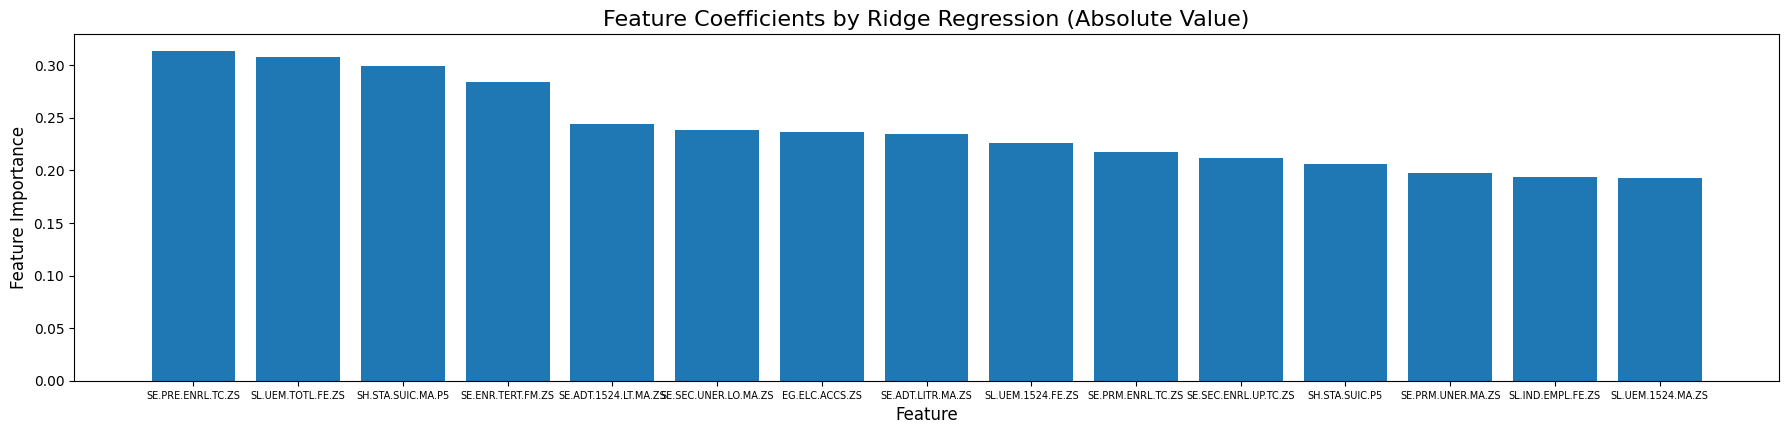

In [17]:
# Plot 15 most imp features
rr_feature_coef = feature_coef_sort[:15]["Coefficient"]
rf_feature_coef_name = feature_coef_sort[:15].index

plt.figure(figsize=(22, len(rf_feature_coef_name) * 0.3))  # Adjust the figure size
plt.bar(rf_feature_coef_name, rr_feature_coef, align='center')
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Feature Importance', fontsize=12)
plt.title('Feature Coefficients by Ridge Regression (Absolute Value)', fontsize=16)

# plt.yticks(fontsize=12)
plt.xticks(fontsize=7)
plt.show()

In [18]:
# random forest
rf = RandomForestRegressor(random_state=my_seed)
rf.fit(X_train_std,y_train)

y_pred_rf = rf.predict(X_test_std)
mean_squared_error(y_pred_rf,y_test)

2.1216103039109973

In [19]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1322878,
 'verbose': 0,
 'warm_start': False}

In [20]:
# random forest CV

param_grid_rf = {
    'randomforestregressor__n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1200, num = 6)],
    'randomforestregressor__max_depth': [int(x) for x in np.linspace(50, 100, num = 6)],
    'randomforestregressor__min_samples_split': [2,4,6],
    'randomforestregressor__min_samples_leaf' : [1,2,4]
}
print(param_grid_rf)

{'randomforestregressor__n_estimators': [200, 400, 600, 800, 1000, 1200], 'randomforestregressor__max_depth': [50, 60, 70, 80, 90, 100], 'randomforestregressor__min_samples_split': [2, 4, 6], 'randomforestregressor__min_samples_leaf': [1, 2, 4]}


In [21]:
# create a pipeline for RF
n_cpu=7
pipe_rf = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=my_seed,n_jobs=n_cpu))

gs_rf = GridSearchCV(estimator=pipe_rf, param_grid=param_grid_rf, scoring = 'neg_mean_squared_error', cv=10, verbose=2, n_jobs=n_cpu)

In [22]:
gs_rf.fit(X_train, y_train)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(n_jobs=7,
                                                              random_state=1322878))]),
             n_jobs=7,
             param_grid={'randomforestregressor__max_depth': [50, 60, 70, 80,
                                                              90, 100],
                         'randomforestregressor__min_samples_leaf': [1, 2, 4],
                         'randomforestregressor__min_samples_split': [2, 4, 6],
                         'randomforestregressor__n_estimators': [200, 400, 600,
                                                                 800, 1000,
                                                                 1200]},
             scoring='neg_mean_squared_error', verbose=2)

In [23]:
print(gs_rf.best_params_)
gs_rf.best_score_

{'randomforestregressor__max_depth': 70, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__n_estimators': 1200}


-1.9403959779891813

In [98]:
# random forest
rf2 = RandomForestRegressor(random_state=my_seed, max_depth=60, min_samples_leaf=1, min_samples_split=2,n_estimators=1200)
rf2.fit(X_train_std,y_train)

y_pred_rf2 = rf2.predict(X_test_std)
print(mean_squared_error(y_pred_rf2,y_test))
print(mean_absolute_percentage_error(y_pred_rf2, y_test))

1.8645647772827403
0.013904040470453636


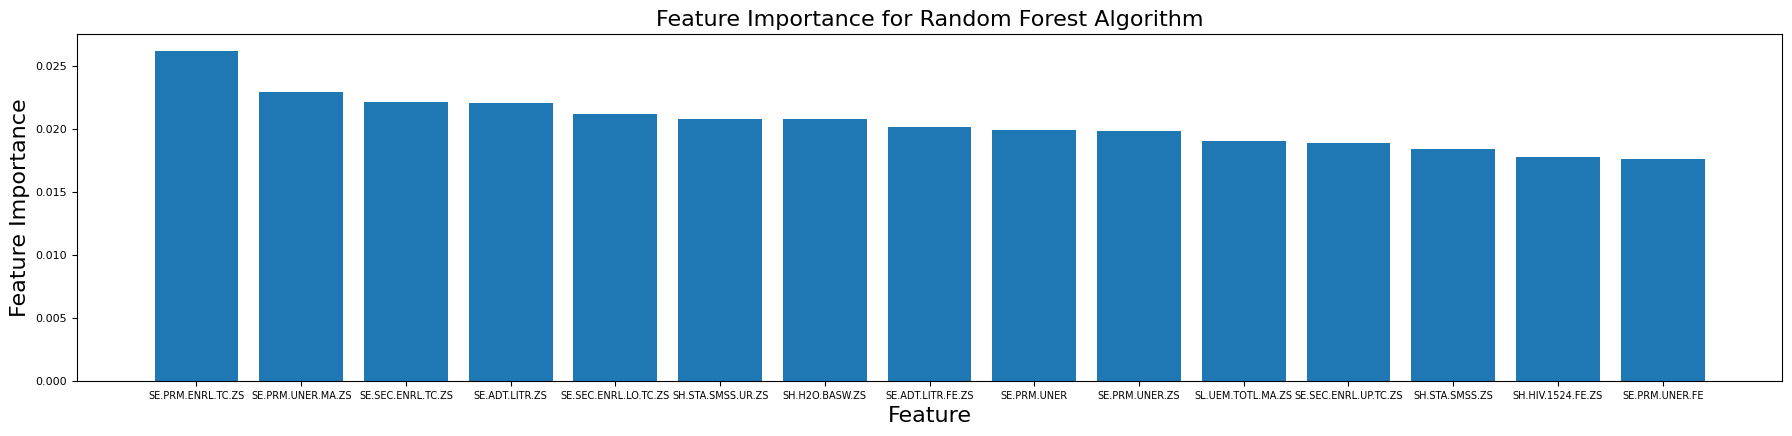

In [25]:
# feature importance for RF
rf_feature_imps = sorted(zip(rf2.feature_importances_, feature_names), reverse=True)  # Sort by imp value

# Plot 15 most imp features
rf_feature_imps_val = [item[0] for item in rf_feature_imps[:15]]
rf_feature_imps_name = [item[1] for item in rf_feature_imps[:15]]

plt.figure(figsize=(22, len(rf_feature_imps_name) * 0.3))  # Adjust the figure size
plt.bar(rf_feature_imps_name, rf_feature_imps_val, align='center')
plt.xlabel('Feature', fontsize=16)
plt.ylabel('Feature Importance', fontsize=16)
plt.title('Feature Importance for Random Forest Algorithm', fontsize=16)

plt.yticks(fontsize=8)
plt.xticks(fontsize=7)
plt.show()

In [76]:
# Try gradient boosting

gbr = GradientBoostingRegressor(random_state=my_seed)
gbr.fit(X_train_std,y_train)

y_pred_gbr = gbr.predict(X_test_std)
mean_squared_error(y_pred_gbr,y_test)

2.242969604077191

In [77]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 1322878,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [88]:
# gradient boosting CV

param_grid_gbr = {
    'gradientboostingregressor__n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1100, num = 6)],
    'gradientboostingregressor__max_depth': [int(x) for x in np.linspace(5, 55, num = 6)],
    'gradientboostingregressor__min_samples_split': [2,4,6],
    'gradientboostingregressor__min_samples_leaf' : [1,2,4]
}
print(param_grid_gbr)

{'gradientboostingregressor__n_estimators': [100, 300, 500, 700, 900, 1100], 'gradientboostingregressor__max_depth': [5, 15, 25, 35, 45, 55], 'gradientboostingregressor__min_samples_split': [2, 4, 6], 'gradientboostingregressor__min_samples_leaf': [1, 2, 4]}


In [100]:
# create a pipeline for GBR
pipe_gbr = make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=my_seed))

gs_gbr1 = GridSearchCV(estimator=pipe_gbr, param_grid=param_grid_gbr, scoring = 'neg_mean_squared_error', cv=10, verbose=2, n_jobs=n_cpu)
gs_gbr2 = GridSearchCV(estimator=pipe_gbr, param_grid=param_grid_gbr, scoring = 'neg_mean_absolute_percentage_error', cv=10, verbose=2, n_jobs=n_cpu)

In [101]:
# train gbr using gridsearch
gs_gbr1.fit(X_train, y_train)
gs_gbr2.fit(X_train, y_train)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('gradientboostingregressor',
                                        GradientBoostingRegressor(random_state=1322878))]),
             n_jobs=7,
             param_grid={'gradientboostingregressor__max_depth': [5, 15, 25, 35,
                                                                  45, 55],
                         'gradientboostingregressor__min_samples_leaf': [1, 2,
                                                                         4],
                         'gradientboostingregressor__min_samples_split': [2, 4,
                                                                          6],
                         'gradientboostingregressor__n_estimators': [100, 300,
                                                                     500, 700,
                                                                     900,
                                                                     1100]},
             scoring='neg_mean_absolute_percentage_error', verbose=2)

In [92]:
print(gs_gbr1.best_params_)
gs_gbr1.best_score_

{'gradientboostingregressor__max_depth': 5, 'gradientboostingregressor__min_samples_leaf': 2, 'gradientboostingregressor__min_samples_split': 2, 'gradientboostingregressor__n_estimators': 500}


-1.6582545397365116

In [102]:
print(gs_gbr2.best_params_)
gs_gbr2.best_score_

{'gradientboostingregressor__max_depth': 15, 'gradientboostingregressor__min_samples_leaf': 1, 'gradientboostingregressor__min_samples_split': 6, 'gradientboostingregressor__n_estimators': 300}


-0.013886596858542388

In [104]:
# final GBR
gbr2 = GradientBoostingRegressor(random_state=my_seed, max_depth= 15, min_samples_leaf=1, min_samples_split=6, n_estimators=300)
gbr2.fit(X_train_std,y_train)

y_pred_gbr2 = gbr2.predict(X_test_std)
print(mean_squared_error(y_pred_gbr2,y_test))
print(mean_absolute_percentage_error(y_pred_gbr2,y_test))

1.1981512804835233
0.01169528680065943


In [26]:
"""
Looking at the gender gap in primary completion rate
"""

y_gap = df_tp["SE.PRM.CMPT.MA.ZS"] - df_tp["SE.PRM.CMPT.FE.ZS"]
X_train, X_test, y_gap_train, y_gap_test = train_test_split(X, y_gap, test_size=0.2, random_state=my_seed)

In [27]:
# base model - linear regression
lr_gap = LinearRegression().fit(X_train_std, y_gap_train)
y_gap_pred_lr = lr_gap.predict(X_test_std)

mean_squared_error(y_gap_pred_lr, y_gap_test)

0.6327726275115583

In [28]:
# Ridge regression
rr_gap = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1],store_cv_values=True).fit(X_train_std, y_gap_train)
y_gap_pred_rr = rr_gap.predict(X_test_std)

mean_squared_error(y_gap_pred_rr,y_gap_test)

0.2500432620273657

In [29]:
rr_gap.alpha_

1.0

In [30]:
rr_gap_coef = rr_gap.coef_
rr_gap_coef_df = pd.DataFrame(rr_gap_coef, index=feature_names, columns=['Coefficient'])

In [31]:
rr_gap_coef_df["Coefficient"] = abs(rr_gap_coef_df["Coefficient"])
rr_gap_coef_df_sort = rr_gap_coef_df.sort_values(ascending=False, by="Coefficient")
rr_gap_coef_df_sort

,Coefficient
Series Code,
SL.UEM.TOTL.FE.ZS,0.250771
SP.URB.GROW,0.202287
SE.ENR.TERT.FM.ZS,0.194432
SE.SEC.CMPT.LO.MA.ZS,0.187007
SE.SEC.CMPT.LO.ZS,0.165806
...,...
SE.SEC.UNER.LO.FE.ZS,0.004754
SE.ADT.1524.LT.ZS,0.003824
SE.ADT.LITR.ZS,0.003180


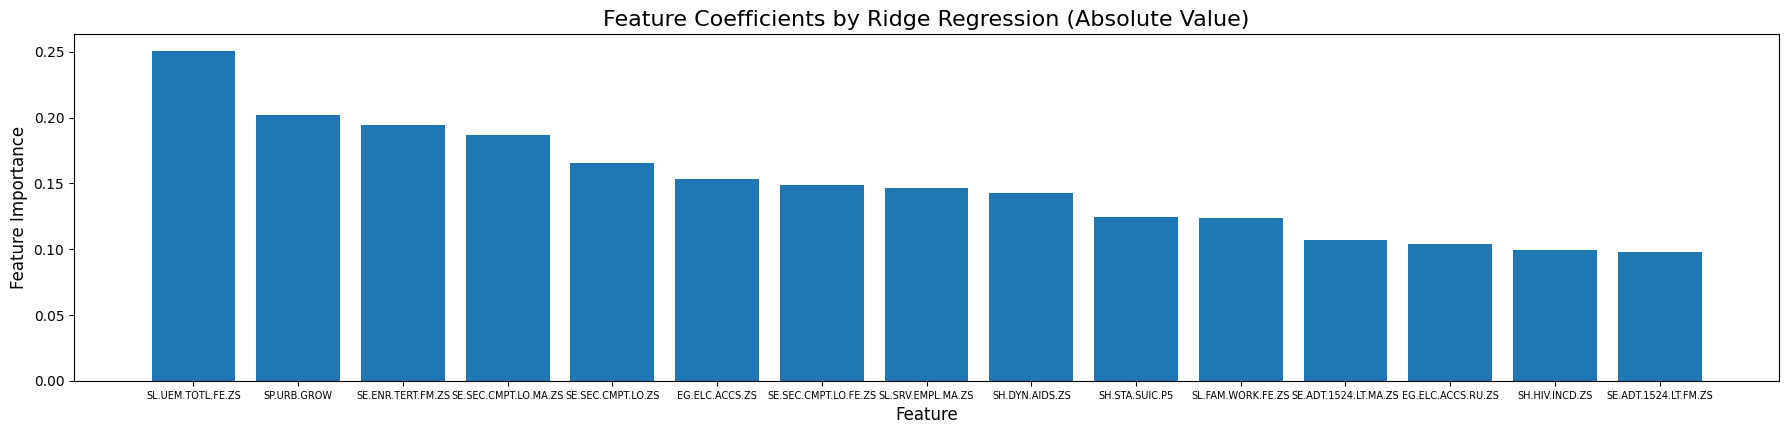

In [32]:
# Plot 15 most imp features
rr_gap_feature_coef = rr_gap_coef_df_sort[:15]["Coefficient"]
rf_gap_feature_coef_name = rr_gap_coef_df_sort[:15].index

plt.figure(figsize=(22, len(rf_gap_feature_coef_name) * 0.3))  # Adjust the figure size
plt.bar(rf_gap_feature_coef_name, rr_gap_feature_coef, align='center')
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Feature Importance', fontsize=12)
plt.title('Feature Coefficients by Ridge Regression (Absolute Value)', fontsize=16)

# plt.yticks(fontsize=12)
plt.xticks(fontsize=7)
plt.show()

In [33]:
common_indexes = feature_coef_sort[:15].index.intersection(rr_gap_coef_df_sort[:15].index)

print(common_indexes)

Index(['SL.UEM.TOTL.FE.ZS', 'SE.ENR.TERT.FM.ZS', 'SE.ADT.1524.LT.MA.ZS',
       'EG.ELC.ACCS.ZS', 'SH.STA.SUIC.P5'],
      dtype='object', name='Series Code')


In [62]:
sub_col =  []
sub_col.append(df_tp.columns[0])
for i in range(1,len(df_tp.columns)):
    if df_tp.columns[i][:10] != df_tp.columns[i-1][:10]:
        sub_col.append(df_tp.columns[i])

len(sub_col)

40

In [63]:
random.seed(my_seed)
sub_col = random.sample(sub_col,14)
if "SE.PRM.CMPT.ZS" not in sub_col:
    sub_col.append("SE.PRM.CMPT.ZS")

sub_col

['SE.SEC.ENRL.TC.ZS',
 'SN.ITK.DEFC.ZS',
 'SE.PRM.ENRL.TC.ZS',
 'SL.EMP.WORK.FE.ZS',
 'SL.IND.EMPL.ZS',
 'SE.PRE.ENRR',
 'SL.FAM.WORK.FE.ZS',
 'SL.UEM.1524.FE.ZS',
 'SH.DYN.AIDS.ZS',
 'SH.STA.SMSS.ZS',
 'SE.ADT.LITR.FE.ZS',
 'SE.TER.ENRR.FE',
 'SP.ADO.TFRT',
 'EG.ELC.ACCS.ZS',
 'SE.PRM.CMPT.ZS']

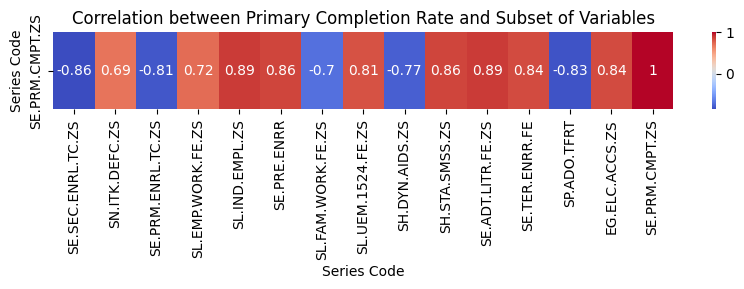

In [73]:
### Data Visualisation to identiy potential problems
corr_matrix = df_tp[sub_col].corr()
target_corr = corr_matrix[["SE.PRM.CMPT.ZS"]]

# Plot the heatmap
plt.figure(figsize=(10, 1))
sns.heatmap(target_corr.transpose(), cmap='coolwarm', annot=True)
plt.title('Correlation between Primary Completion Rate and Subset of Variables')
plt.show()